# Experiment in trying to predict a lottey number

Note: We know that is almost impossible BUT we can try to apply some Data Sciencey stuff and see what will happen

So... the plan is to use a quick model first like ARIMA and see the results and after that we will build a full scalle deep learning model!

In [39]:
# imports
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from src.utils import read_all_parquet_files

In [54]:
# dataset filename
DATASET_LOCAL_COPY = './static/data/'

# List of columns to forecast
COLUMNS_TO_FORECAST = ['Ball_1', 'Ball_2', 'Ball_3', 'Ball_4', 'Ball_5', 'Ball_Bonus']

In [44]:
# read in lottery games data 
all_games = read_all_parquet_files(DATASET_LOCAL_COPY)

# need to convert data 
all_games['Ball_1'] = all_games['Ball_1'].astype('int32')
all_games['Ball_2'] = all_games['Ball_2'].astype('int32')
all_games['Ball_3'] = all_games['Ball_3'].astype('int32')
all_games['Ball_4'] = all_games['Ball_4'].astype('int32')
all_games['Ball_5'] = all_games['Ball_5'].astype('int32')
all_games['Ball_Bonus'] = all_games['Ball_Bonus'].astype('int32')

In [45]:
all_games.describe(include='all')

,Date,Ball_1,Ball_2,Ball_3,Ball_4,Ball_5,Ball_Bonus
count,599,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,2021-08-03 00:28:50.884807936,12.150250,23.277129,35.277129,47.193656,58.564274,13.310518
min,2019-01-02 00:00:00,1.000000,2.000000,3.000000,7.000000,22.000000,1.000000
25%,2020-06-08 00:00:00,4.000000,15.000000,26.000000,39.000000,54.000000,6.000000
50%,2021-10-16 00:00:00,10.000000,22.000000,36.000000,48.000000,61.000000,13.000000
75%,2022-09-29 12:00:00,18.000000,31.000000,44.000000,57.000000,66.000000,20.000000
max,2023-09-13 00:00:00,52.000000,58.000000,64.000000,68.000000,69.000000,26.000000
std,NaN,9.807723,11.853058,12.430543,11.949555,9.377023,7.712675


Lets us split data into training and validation dataset

In [46]:
# Select the 'Ball_1' column for forecasting
data_col = 'Ball_1'
ts_data = all_games[data_col]

In [47]:
ts_data.tail(200)

399     1
400    25
401    39
402    10
403    14
       ..
594     4
595    18
596    35
597    12
598     7
Name: Ball_1, Length: 200, dtype: int32

In [52]:

# Fit an ARIMA model using pmdarima to automatically select the best hyperparameters
model = auto_arima(ts_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
best_order = model.get_params()['order']

# Fit the ARIMA model with the best hyperparameters
arima_model = ARIMA(ts_data, order=best_order)
arima_fit = arima_model.fit()

# Forecast the next data point
forecast = arima_fit.forecast(steps=5)

forecast
print(f"Forecast for the next data point ('{data_col}'): {forecast.iloc[0]:.2f}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4993.855, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4736.401, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4846.371, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4660.789, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4594.847, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4556.911, Time=0.07 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4539.682, Time=0.11 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.64 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4449.447, Time=0.50 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4447.661, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=4451.559, Time=0.35 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4442.187, T

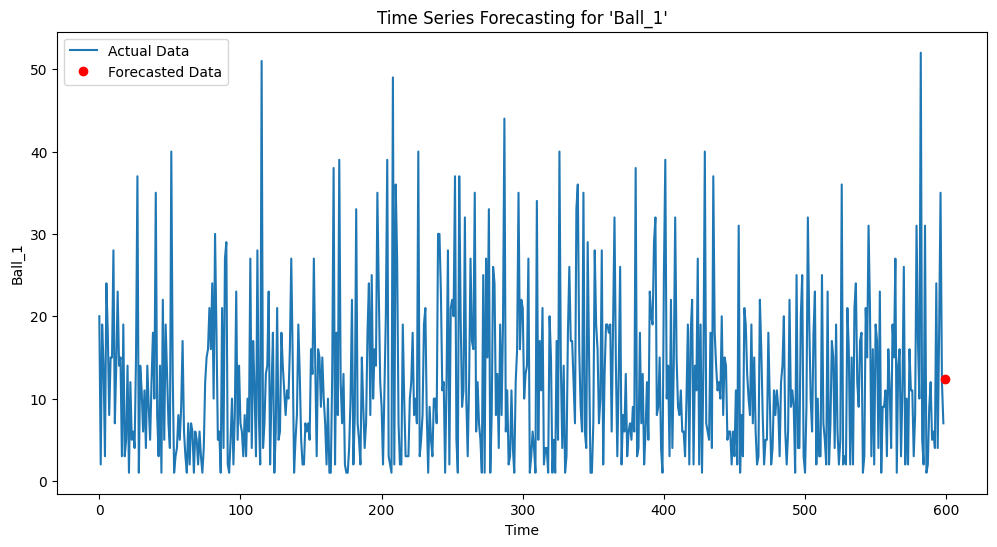

In [53]:
# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Actual Data')
plt.plot(len(ts_data), forecast.iloc[0], 'ro', label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel(data_col)
plt.legend()
plt.title(f"Time Series Forecasting for '{data_col}'")
plt.show()

## let us add additional features

In [ ]:
# Calculate weights based on historical frequency
weights = {}
for column in COLUMNS_TO_FORECAST:
    number_counts = all_games[column].value_counts(normalize=True).to_dict()
    total_samples = len(all_games[column])
    column_weights = {number: count / total_samples for number, count in number_counts.items()}
    weights[column] = column_weights

In [31]:
# List of columns to forecast
columns_to_forecast = ['Ball_1', 'Ball_2', 'Ball_3', 'Ball_4', 'Ball_5', 'Ball_Bonus']

# Loop through each column and fit ARIMA models
for column in columns_to_forecast:
    ts_data = all_games[column].astype(float)

    # Use auto_arima to automatically select the best hyperparameters
    model = auto_arima(ts_data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    best_order = model.get_params()['order']

    # Fit the ARIMA model with the best hyperparameters
    arima_model = ARIMA(ts_data, order=best_order)
    arima_fit = arima_model.fit()

    # Forecast the next data point
    forecast = arima_fit.forecast(steps=1)
    print(f"Forecast for the next data point ('{column}'): {forecast.iloc[0]:.2f}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9985.711, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9468.317, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9688.363, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9314.347, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9179.365, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=9102.353, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=9065.273, Time=0.19 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=1.13 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=8873.028, Time=0.35 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=8871.056, Time=0.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=8870.356, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=8869.212, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8873.0

i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_mode

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11218.912, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10084.046, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=10685.589, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9813.735, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9672.893, Time=0.10 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=9565.331, Time=0.14 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=9516.784, Time=0.19 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=1.11 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=9338.439, Time=0.79 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=9336.478, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.91 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=9328.902, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercep

i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_mode

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12079.279, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10122.953, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11238.090, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9873.230, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9721.990, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=9675.022, Time=0.13 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=9447.489, Time=0.77 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=9448.893, Time=0.51 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=9448.921, Time=0.91 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.84 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.47 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=1.08 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=9439.643, Time=0.35 sec
 ARIMA(3,0,1)(0,0,0)[0] intercep

i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_mode

Forecast for the next data point ('Ball_3'): 34.11
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12710.906, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10069.466, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11673.001, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9815.787, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=9644.473, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.68 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=9341.442, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9344.288, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=9342.041, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=9343.430, Time=0.25 sec
 ARI

i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_mode

 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13184.072, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9536.240, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=11959.563, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8764.776, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=8764.652, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8764.419, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8766.332, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=8759.247, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8761.421, Time=0.23 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=8760.003, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8762.125, Time=0.44 sec
 ARIMA(0,0,2)(0,0,0)[0]     

i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
i:\workspace\Experiments_in_DataScience\Experiments_in_DataScience\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_mode

Forecast for the next data point ('Ball_5'): 58.00


ValueError: Input y contains NaN.

In [ ]:
data = all_games.values - 1
train = data[:-50]
test = data[-50:]

w = 7 # window
X_train = []
y_train = []
for i in range(w, len(train)):
    X_train.append(train[i - w: i, :])
    y_train.append(train[i])
X_train, y_train = np.array(X_train), np.array(y_train)

inputs = data[data.shape[0] - test.shape[0] - w:]
X_test = []
for i in range(w, inputs.shape[0]):
    X_test.append(inputs[i - w: i, :])
X_test = np.array(X_test)
y_test = test

In [ ]:
print(data.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
total_balls = 5
highest_ball=69
embed_dim = (highest_ball // 2) + 1
dropout_rate = 0.5
spatial_dropout_rate = 0.5
steps_before = w
steps_after = total_balls
feature_count = embed_dim * total_balls
hidden_neurons = [128, 64, 48, 64, 64, 128]
bidirectional = True
attention_style = 'Bahdanau'

In [ ]:
import gc
import os
import math
import numpy as np
import pandas as pd
from numba import njit
from numpy import sqrt, sin, cos, pi, zeros
from numpy.random import randn, rand, uniform, normal
from scipy.linalg import hadamard
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Activation, LSTM, Dropout, RepeatVector, TimeDistributed, Embedding, Reshape, Dot, Concatenate
from tensorflow.keras.layers import GRU, SpatialDropout1D, Conv1D, GlobalMaxPooling1D,Multiply, Lambda, Softmax, Flatten, BatchNormalization, Bidirectional, dot, concatenate
from tensorflow.keras.layers import AdditiveAttention, Attention
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from tensorflow.keras import backend
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import MeanSquaredError
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE